How not to do it: 
* Don't use extreme values of parameters 
* Do not use too much different augmentations 
* Most of the time Do not apply augmentation always, rather with some smaller probability. `In case of some tasks there are exceptions e.g cropping in case of images`
* Do not not apply random augmentations think about these that are related to the problem

#### Audio augmentations examples

In [1]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift, LowPassFilter, BandStopFilter
import librosa
import soundfile as sf

In [2]:
augment_good = Compose([
    AddGaussianNoise(min_amplitude=0.01, max_amplitude=0.02, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_fraction=-0.5, max_fraction=0.5, p=0.5)
])

In [3]:
augment_bad = Compose([
    AddGaussianNoise(min_amplitude=0.9, max_amplitude=1, p=1),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=1),
    PitchShift(min_semitones=-12, max_semitones=-11, p=1),
    Shift(min_fraction=-0.5, max_fraction=0.5, p=1),
    LowPassFilter(min_cutoff_freq=50, max_cutoff_freq=500, p=1),
    BandStopFilter(p=1)
])

In [4]:
signal, sr = librosa.load("data/scale.wav")
augmented_good_signal = augment_good(samples=signal, sample_rate=sr)
augmented_bad_signal = augment_bad(samples=signal, sample_rate=sr)
sf.write("data/augmented.wav", augmented_good_signal ,sr)
sf.write("data/augmented_bad.wav", augmented_bad_signal ,sr)

### Image augmentations examples

In [5]:
import albumentations as A
import cv2 as cv
import matplotlib.pyplot as plt

In [6]:
img = cv.imread("data/cat.jpg")

In [7]:
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=0.5,p=0.5),
])

In [10]:
img_augmented = transform(image=img)["image"]
img_augmented2 = transform(image=img)["image"]
img_augmented3 = transform(image=img)["image"]

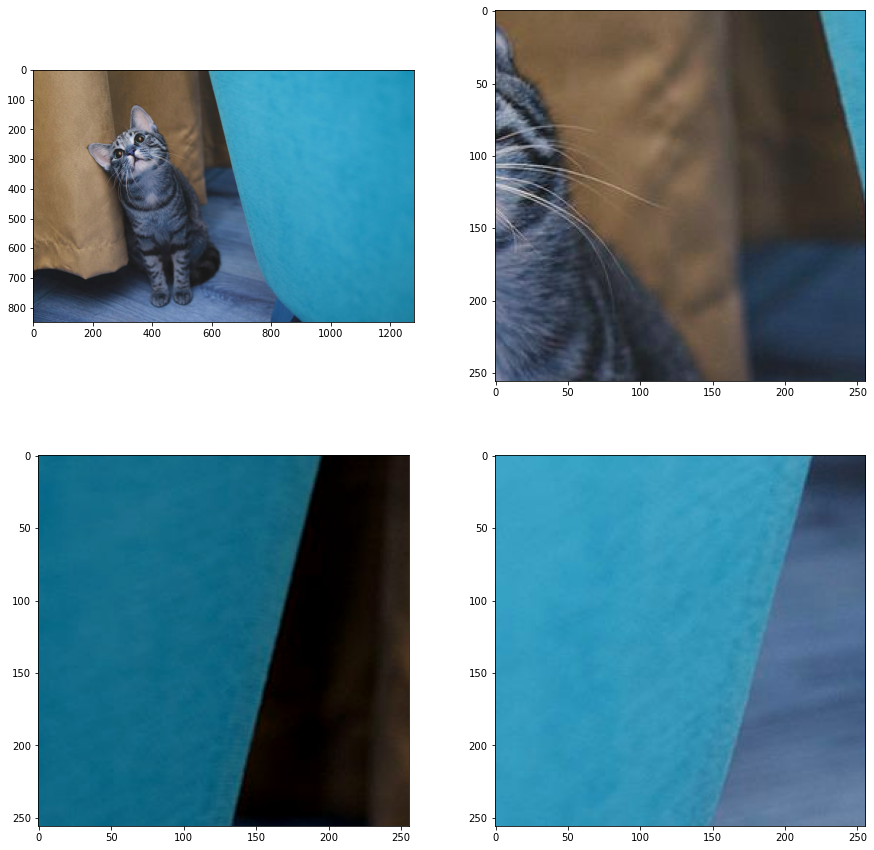

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
ax[0][0].imshow(img)
ax[1][0].imshow(img_augmented)
ax[0][1].imshow(img_augmented2)
ax[1][1].imshow(img_augmented3)

Cool answer from reddit

Data augmentation is in many cases about understanding which types of variations in the data that does not affect its class. Oftentimes, this is connected to equivariance/invariance assumptions concerning the data.

As an example, I can take my own field, music information retrieval, and the task of polyphonic pitch tracking. In this task, the timbre of the audio (e.g. frequency response) can vary without affecting the correct transcription; this is an invariance assumption. Furthermore, the tempo or pitch can be varied if it is reflected in the same displacement in the output annotations; this is an equivariance assumption.

It is therefore important to understand exactly what you wish to predict for, and what factors in the data that would render the output class unaffected, or would change the output annotation according to a valid equivariance assumption. Unfortunately, I do not know anything about credit card transaction tasks but I would start with listing factors of variations in the data that are:

Irrelevant to the output class, or will affect the output class in ways you can control

You can develop methods for varying

You cannot instead fully account for with parameter sharing or preprocessing
<br><br>


Data augmentation is the process of applying a transform to your data that changes the data features while preserving how they correspond with target/label value, thereby "creating" more training examples. This is a lot harder to do with structured data than with image data and will usually depend on domain knowledge, i.e. do you know enough about the features to know how to change them without it affecting the target value?

One example I can think if would be applying synonym replacements to your description field.


#### NLP Augmentations

In [12]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

In [13]:
text = 'The quick brown fox jumps over the lazy dog .'
print(text)

The quick brown fox jumps over the lazy dog .


In [22]:
aug = nac.KeyboardAug(aug_char_p=0.05, aug_word_p=0.05)
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
The quick brown fox jumpq over the lazy dog.


In [ ]:
#If we had a model we could do some fancier things
aug = naw.WordEmbsAug(
    model_type='word2vec', model_path=model_dir+'GoogleNews-vectors-negative300.bin',
    action="substitute")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

#### Statistical data augmentation

`Bootstraping` (random sampling with replacement). We can create many different datasets using this, each dataset is like a separate experiment. Then we can either calculate any statistical measure or train model ensambles. `Used rather in classical ML`

In [23]:
# Boots
from sklearn.utils import resample
# data sample
data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # Assume these are patients and these are theirs attributes
# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=len(data), random_state=1)
print('Bootstrap Sample: %s' % boot)
# out of bag observations
oob = [x for x in data if x not in boot]
print('OOB Sample: %s' % oob)

Bootstrap Sample: [0.6, 0.9, 0.6, 0.1, 0.1, 0.2, 0.8, 0.7, 0.3]
OOB Sample: [0.4, 0.5]


UnderSampling and Oversampling. These are kind of data augmentations. Knowing how to deal with such problems is helpful. Also these are quite old methods

In case of Neural network we can just increase weight of imbalanced class in the loss function but it is still good to know something more

Counter({0: 901, 1: 99})


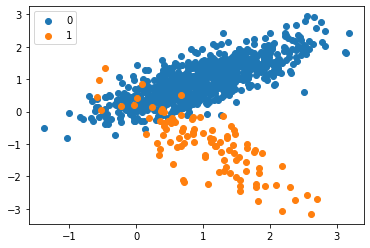

In [26]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Undersampling - mostly some KNN methods

Counter({0: 221, 1: 99})


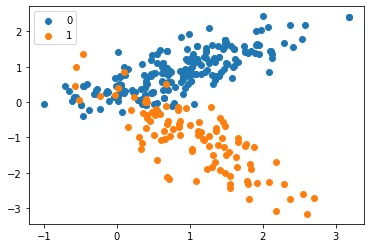

In [25]:
from imblearn.under_sampling import OneSidedSelection

undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
X, y = undersample.fit_resample(X, y)
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Oversampling - KNN methods, maybe some Generative models (risky). Also one can use domain knowledge for it

Counter({0: 900, 1: 450})


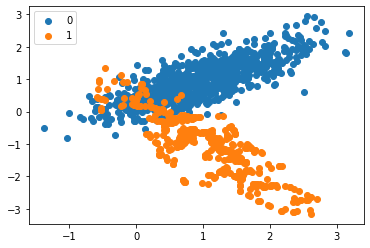

In [27]:
# Oversample with SMOTE and random undersample for imbalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()